# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/bank-additional-full.csv", sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [ ]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [ ]:
X

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
41184,46,383,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
41186,44,442,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
y

,yes
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


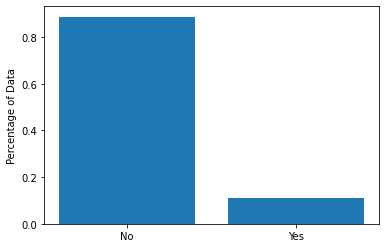

In [ ]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

- As we can see from the visualization above, around 85% of our data is "no" and around 15% is "yes." Due to this discrepancy, I will apply RandomOverSampler in order to make more samples for the minority class, 'yes', until it has the same amount of samples as 'no', the majority class.

In [ ]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import RandomOverSampler
# Resample the data
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

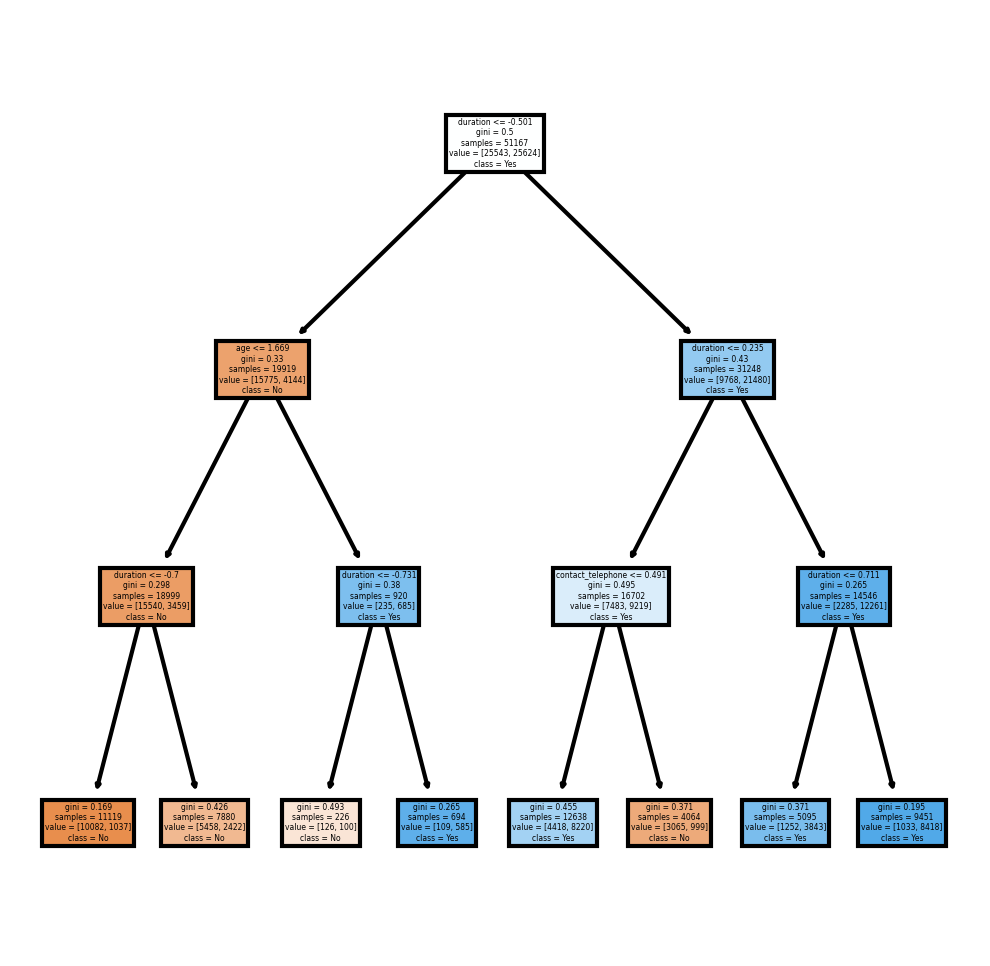

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])
fig.savefig('tree2.png')

# 2b.) Confusion matrix on out of sample data. Visualize and store as variable

In [ ]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
tree_predictions = y_pred.copy()

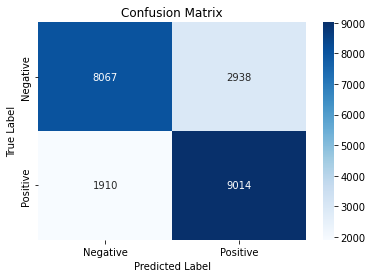

<Figure size 432x288 with 0 Axes>

In [ ]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.savefig('oos_conf_matrix.png')
# will get a conf based on out of sample data

# 3.) Use bagging on your descision tree 

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7786492772128232


In [ ]:
bagging_predictions = y_pred.copy()

In [ ]:
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

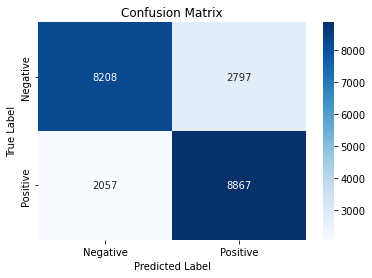

In [ ]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
plt.savefig('second_conf_matrix.png')

<Figure size 432x288 with 0 Axes>

# 4.) Boost your tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
boosting_predictions = y_pred.copy()

In [ ]:

y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

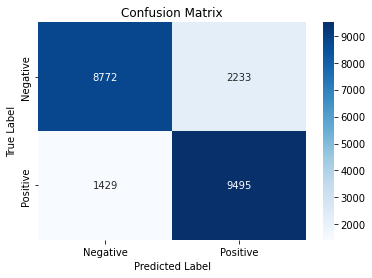

In [ ]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
plt.savefig('third_conf_matrix.png')

<Figure size 432x288 with 0 Axes>

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [ ]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####
from mlens.ensemble import SuperLearner
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
# set base learners
base_learners = [XGBClassifier(), 
                 BaggingClassifier(n_estimators=50), 
                 RandomForestClassifier(n_estimators=50), 
                 MLPClassifier(hidden_layer_sizes=(10, 5)), 
                 KNeighborsClassifier(n_neighbors=5)]

In [ ]:
super_learner = SuperLearner()

In [ ]:
super_learner.add(base_learners)

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [ ]:
# fit to training data

super_learner.fit(X_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [ ]:
# get base predictions
base_predictions= super_learner.predict(X_train)
# base_predictions= super_learner.predict(X_scaled) I think this is right but he had the above in his code so I will go with that

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
base_predictions 

array([[0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1.],
       ...,
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.]], dtype=float32)

In [ ]:
# train meta learner
log_reg = LogisticRegression().fit(base_predictions, y_train) # he had base_learners here but it says it wants a higher d array

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Interpret Coefficients
log_reg.coef_

array([[-0.03835268, -0.1598248 , -0.1598248 ,  0.35987468,  0.15003727]])

Above, you can see that we get the following coefficients. From these coefficients, we can learn the importance of the models we looked at in base_learners. We can see that we received a negative coefficient for the XGB Classifier, Bagging Classifier, and Random Forest Classifier with the XGB classifier coefficient being the smallest. With the MLP Classifier and KNeighbors Classifier we received positive coefficients with the MLP Classifier's coefficient being the largest. From this we can determine that the XGB Classifier had the biggest negative effect on our model, while the MLP Classifier had the largest positive effect.

In [ ]:
# get predictions on test set
base_predictions_test = super_learner.predict(X_test)
log_reg_predictions = log_reg.predict(base_predictions_test)


In [ ]:
from sklearn.metrics import confusion_matrix

# create confusion matrix
conf_mat = confusion_matrix(y_test, log_reg_predictions)

print(conf_mat)

[[10685   320]
 [ 9735  1189]]


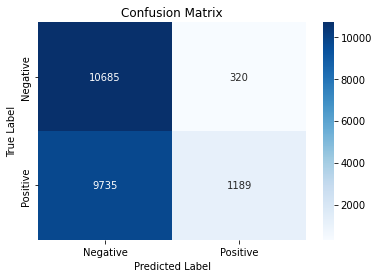

In [ ]:
class_labels = ['Negative', 'Positive']

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
plt.savefig('fourth_conf_matrix.png')

<Figure size 432x288 with 0 Axes>

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and specificities (Out of Sample)

In [ ]:
from sklearn.metrics import classification_report

# classification report for each model
tree_report = classification_report(y_test, tree_predictions, output_dict=True)
bagging_report = classification_report(y_test, bagging_predictions, output_dict=True)
boosting_report = classification_report(y_test, boosting_predictions, output_dict=True)
superlearner_report = classification_report(y_test, log_reg_predictions, output_dict=True)


In [ ]:

# gets the Sensitivities and Specificities from classification report
tree_sensitivity = tree_report['1']['recall']
bagging_sensitivity = bagging_report['1']['recall']
boosting_sensitivity = boosting_report['1']['recall']
superlearner_sensitivity = superlearner_report['1']['recall']

In [ ]:
tree_specificity = tree_report['0']['recall']
bagging_specificity = bagging_report['0']['recall']
boosting_specificity = boosting_report['0']['recall']
superlearner_specificity = superlearner_report['0']['recall']

In [ ]:
sensitivities = [tree_sensitivity, bagging_sensitivity, boosting_sensitivity, superlearner_sensitivity]
specificities = [tree_specificity, bagging_specificity, boosting_specificity, superlearner_specificity]


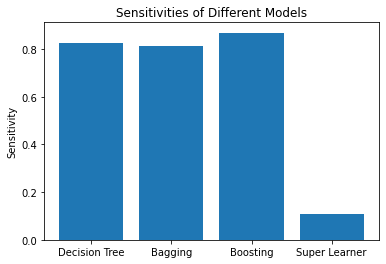

In [ ]:
import matplotlib.pyplot as plt

# create bar chart for Sensitivities
plt.bar(['Decision Tree', 'Bagging', 'Boosting', 'Super Learner'], sensitivities)
plt.title('Sensitivities of Different Models')
plt.ylabel('Sensitivity')
plt.show()

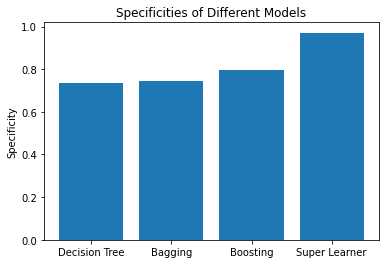

In [ ]:
# create bar chart for Specificities
plt.bar(['Decision Tree', 'Bagging', 'Boosting', 'Super Learner'], specificities)
plt.title('Specificities of Different Models')
plt.ylabel('Specificity')
plt.show()

In [ ]:
#AWS Sagemaker